## Exploratory Data Analysis 

#### Dataset : Big Mart Sales

#### Source of Dataset : Analytics Vidhya

#### The objective here is to explore the data and find out meaningful insights using the various libraries provided and finding the factors that contribute to sales of the products

#### Here, the following has been used,
- pandas to view the data in tabular format
- matplotlib/seaborn for data visualization to get more clarity on how the data is flowing
- also using the python basics to make the tasks easier (functions, lists, dictionaries, for loops)

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('E:/Data Science/Competitions/data/Big Mart')

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore',category= DataConversionWarning)
warnings.simplefilter(action='ignore',category=FutureWarning)

### 2. Reading the datasets

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(8523, 12)
(5681, 11)


In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


### 3. Dataset Information

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### There are 12 features. 
- categorical : 7
- Numerical : 5

In [7]:
## target variable
target = 'Item_Outlet_Sales'

In [8]:
## merging the train and test data so as to perfrom any operation together
df_train['data'] = 'train'
df_test['data'] = 'test'
df_test[target] = 0

In [9]:
df = pd.concat([df_train,df_test])

In [10]:
df.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train


### 4. Viewing the statistical measures

In [13]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,14204.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,1308.865489,0.065953,12.792854,1997.830681
std,62.086938,1699.791423,0.051459,4.652502,8.371664
min,31.290000,0.000000,0.000000,4.555000,1985.000000
25%,94.012000,0.000000,0.027036,8.710000,1987.000000
50%,142.247000,559.272000,0.054021,12.600000,1999.000000
75%,185.855600,2163.184200,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


### 5. Univariate Analysis

In [15]:
## extracting numerical columns
num_cols = df_train.select_dtypes(exclude='object').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

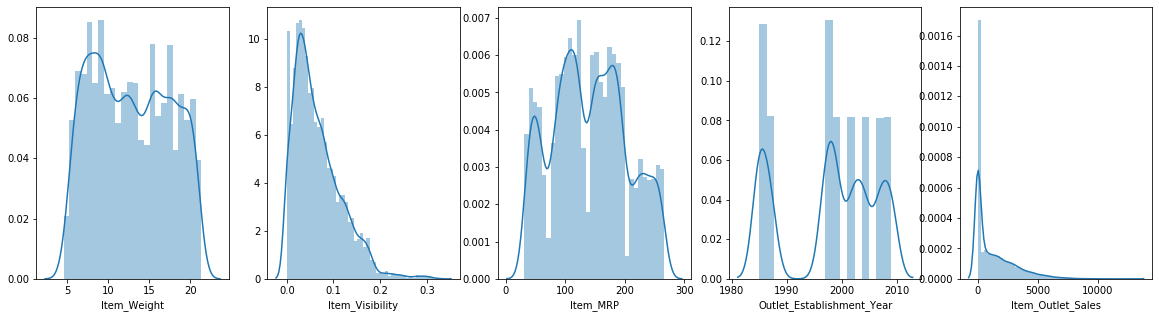

In [16]:
## creating distribution plot to understand the spread of the data
fig = plt.figure(figsize=(20,5))

for i in range(0,len(num_cols)):
    fig.add_subplot(1,len(num_cols),i+1)
    sns.distplot(df[num_cols[i]].dropna())

plt.show()

### Inference:

1. Item weight does not follow a any particular pattern
2. Item visibility is right-skewed, needs a transformation. Also has high 0 values which needs to be explored
3. Item MRP, the data is being distributed in 4 groups
4. outlet establishment year does not seem to contribute much
5. item outlet sales is right skewed

In [17]:
## extracting categorical features
cat_col = df.select_dtypes(include='object').columns.tolist()
cat_col

['Item_Fat_Content',
 'Item_Identifier',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'data']

In [18]:
cat_col.remove('Item_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'data']

In [19]:
cat_col.remove('data')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type']

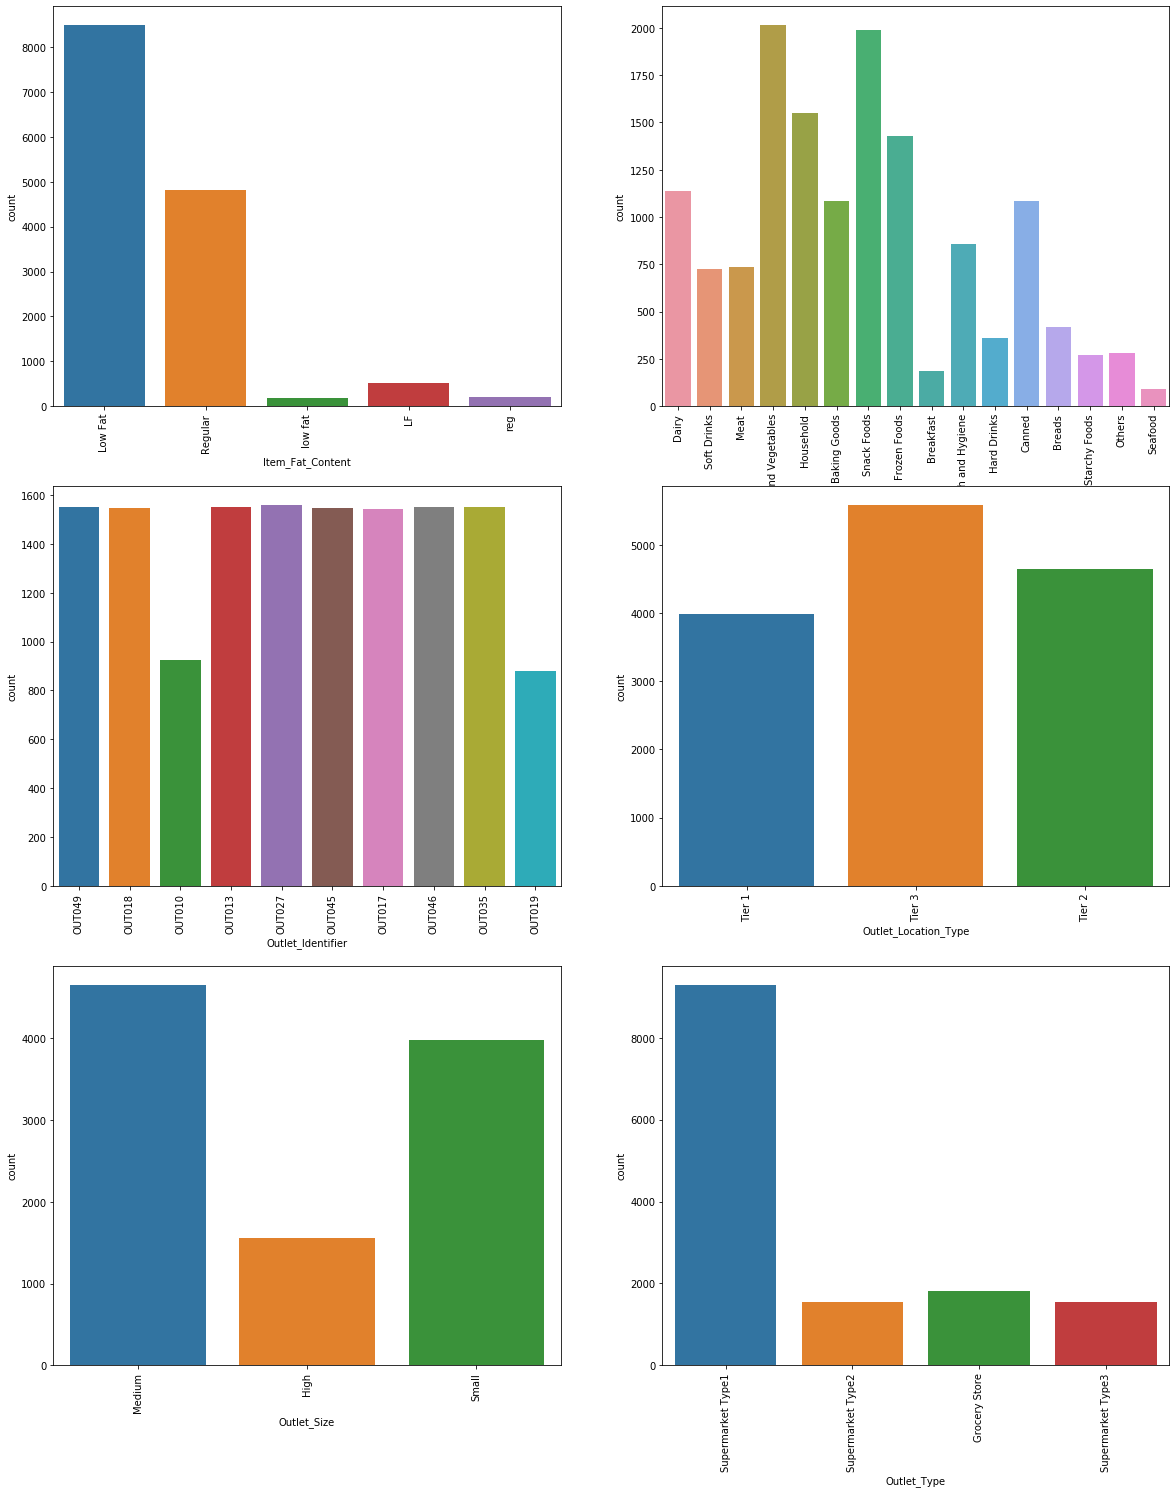

In [20]:
## creating count plots for visualizing categorical data
fig = plt.figure(figsize=(20,25))

for i in range(0,len(cat_col)):
    fig.add_subplot(3,2,i+1)
    sns.countplot(df[cat_col[i]])
    plt.xticks(rotation=90)
plt.show()

## Inference:

1. LF, low fat, and Low Fat come under same category which can be combined as LOW FAT
2. Similarly we can combine reg and Regular into one as REGULAR
3. Some of the items are non-food items, but all the items are categorized either as low fat or regular, which is incorrect. Therefore, we need to assign separate category to non-food items as NON-EDIBLE
4. In Item Type, 
    - fruits and vegetables, canned foods, snack foods, household, dairy, baking goods are the high selling items
    - seafood is least sold item
5. Outlet identifier,
    - out10 and out19 are the least performing outlets
    - out27 is the one making higher revenue
6. Outlet location type,
    - tier 3 location seems to be the one with high sales. It can be thought that outlets like out27 maybe more there
7. Outlet Size,
    - medium sized outlets perform better
    - it can be said that, these medium outlets may be present in tier3 and can be similar to out27
8. Outlet type,
    - supermarket type 1 is the best performing type

### 6. Bivariate Analysis

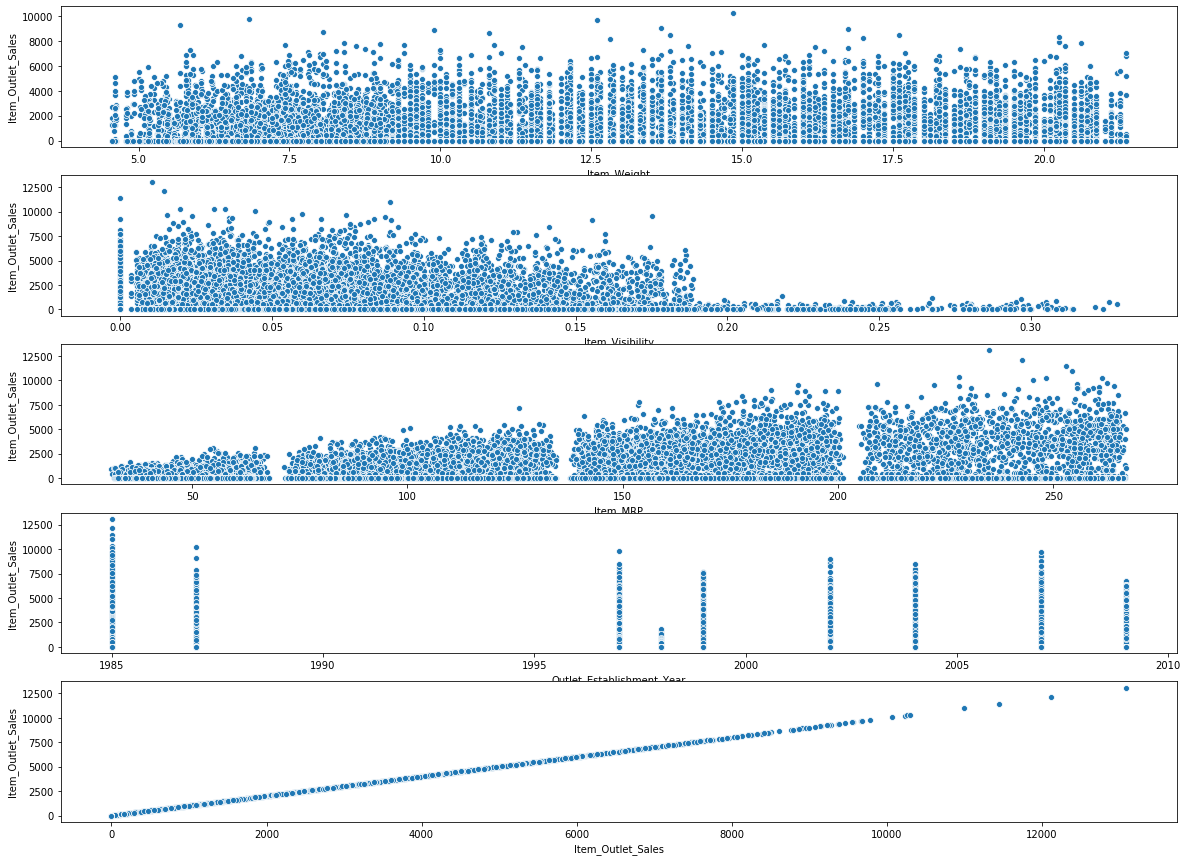

In [21]:
## creating scatter plots to visualize the relation between the numerical and target features

fig = plt.figure(figsize=(20,15))

for i in range(0,len(num_cols)):
    fig.add_subplot(len(num_cols),1,i+1)
    sns.scatterplot(x=df[num_cols[i]] , y = df[target])

plt.show()

## Inference:
1. Item Weight is highly scattered, indicates no relationship with target variable

2. Item visibility 
    - It seems to have a non-linear relationship with target, some of the items have 0 visibility which is incorrect. 
    - The items that do not occupy much space are highly sold, they may be the daily used products which includes fruits and vegetables, canned foods, snack foods as found from the item type feature
    
3. Item MRP, it is clearly visible that there are 4 different groups in MRP

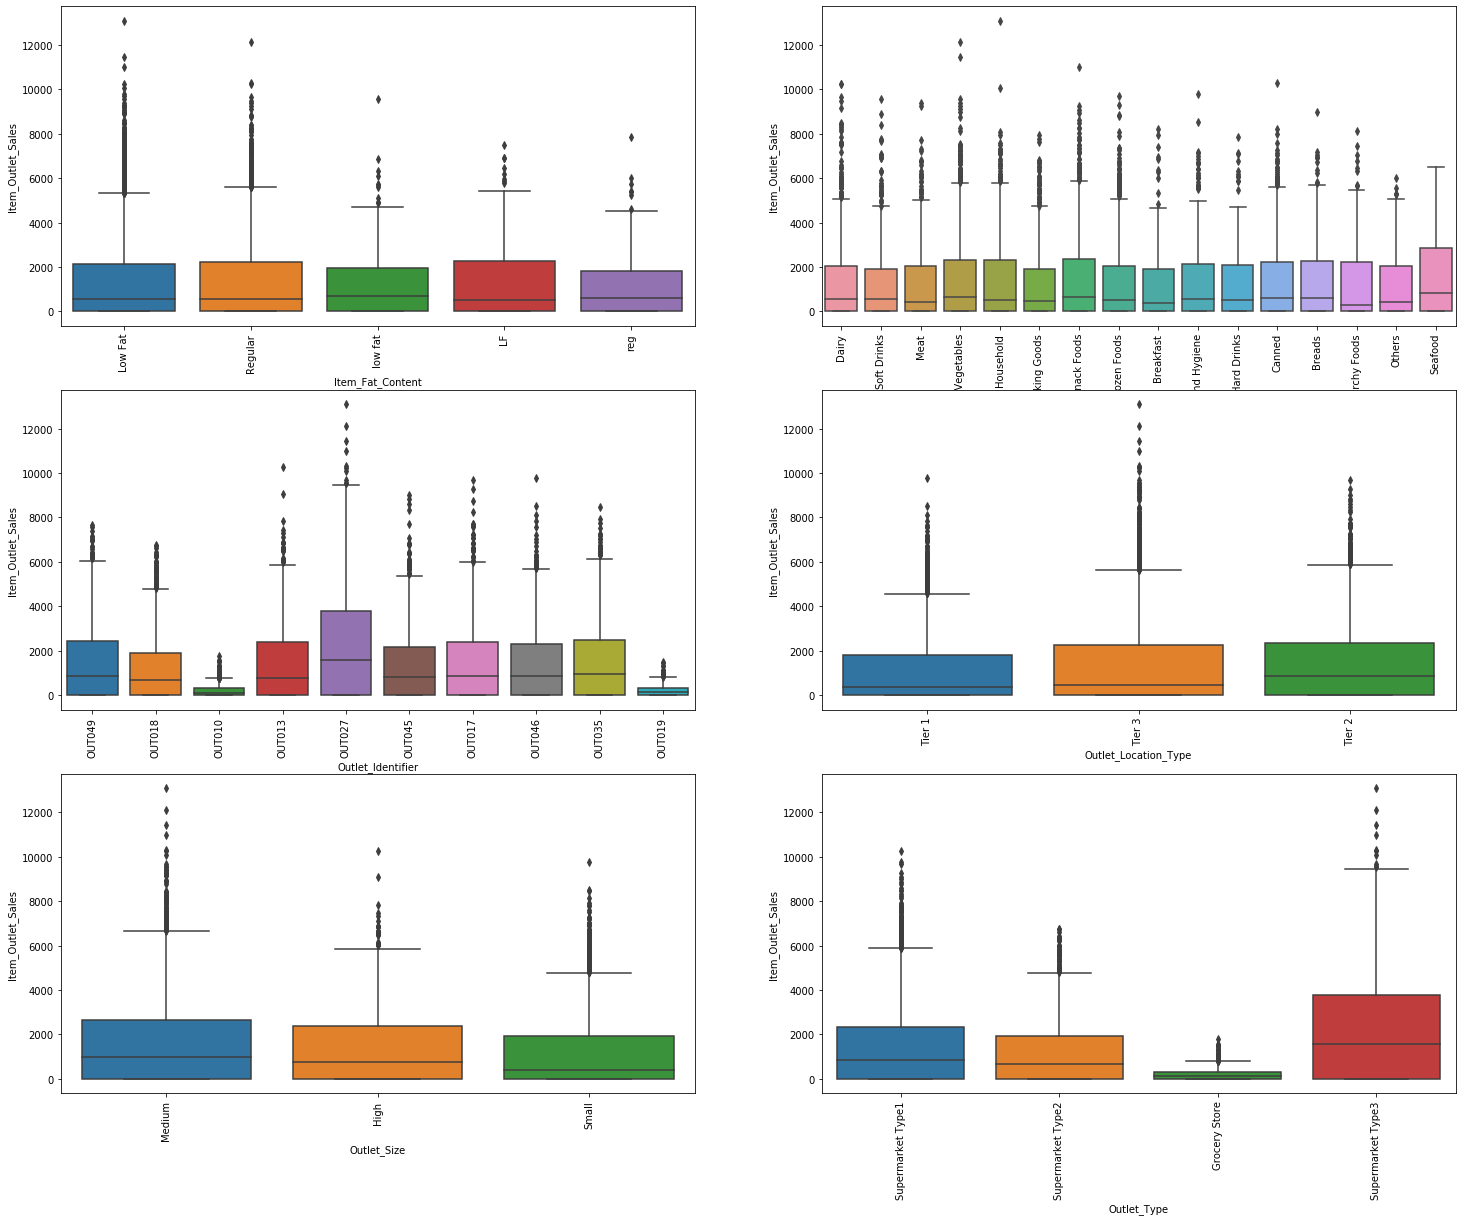

In [22]:
## creating boxplots to visualize the realtion between categorical and target features

fig = plt.figure(figsize=(25,20))

for i in range(0,len(cat_col)):
    fig.add_subplot(3,2,i+1)
    sns.boxplot(df[cat_col[i]], y = df[target])
    plt.xticks(rotation=90)
plt.show()

## Inference:
1. Low Fat products are in demand than regular products
2. fruits and vegetables, canned foods, snack foods are having a low price range and are selling the most
3. seafood has wider price range but the sold the least
4. OUT010 and OUT019 are likely to be grocery stores and which have good amount of sales might be supermarkets

### 7. Check Correlation of the features

In [23]:
df.corr()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
Item_MRP,1.000000,0.342781,-0.006351,0.036236,0.000141
Item_Outlet_Sales,0.342781,1.000000,-0.075008,0.019447,-0.029489
Item_Visibility,-0.006351,-0.075008,1.000000,-0.015901,-0.083678
Item_Weight,0.036236,0.019447,-0.015901,1.000000,0.000645
Outlet_Establishment_Year,0.000141,-0.029489,-0.083678,0.000645,1.000000


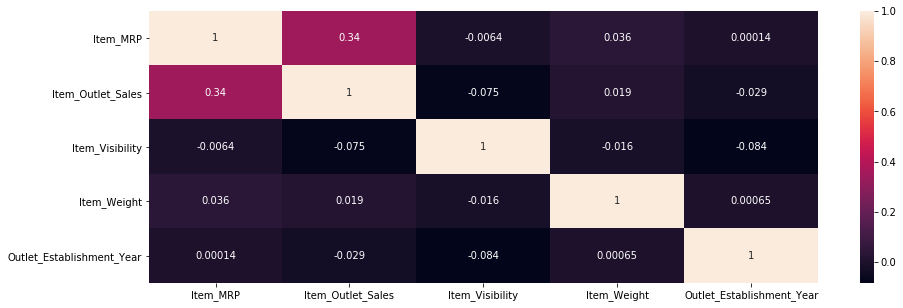

In [24]:
plt.figure(figsize = (15,5))
x = sns.heatmap(df.corr(), annot = True)
bottom,top = x.get_ylim()
x.set_ylim(bottom + 0.5, top- 0.5)
plt.show()

## Inference: 
- The features are not highly correlated with target as well as there is no correlation among the independent features

### 8. Data Pre-processing

- treating null values and incorrect entries

In [21]:
# Item_Fat_Content combine
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'])

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [23]:
# Item_visibility change the 0 values to nan and then impute with median
df['Item_Visibility'].replace(0.0,np.nan,inplace=True)

In [24]:
df.isnull().sum()[df.isnull().sum()>0]

Item_Visibility     879
Item_Weight        2439
Outlet_Size        4016
dtype: int64

In [25]:
df[df['Item_Visibility'].isnull()].head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,NaN,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,NaN,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


In [26]:
locs = df[df['Item_Visibility'].isnull()]['Item_Identifier']

for loc in locs:
    df.loc[df['Item_Identifier'] == loc,'Item_Visibility'] = df.loc[df['Item_Identifier'] == loc,'Item_Visibility'].mean()

In [27]:
# Item Weight
df[df['Item_Weight'].isnull()].head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
18,Low Fat,DRI11,113.2834,2303.6680,Hard Drinks,0.034238,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train


In [28]:
df.loc[df['Item_Identifier'] == 'FDP10', 'Item_Weight'].mean()

19.0

In [29]:
df.loc[df['Item_Identifier'] == 'DRI11', 'Item_Weight'].mean()

8.26

In [30]:
locs = df[df['Item_Weight'].isnull()]['Item_Identifier']

for loc in locs:
    df.loc[df['Item_Identifier'] == loc,'Item_Weight'] = df.loc[df['Item_Identifier'] == loc,'Item_Weight'].mean()

In [31]:
# finding missing values in Outlet Size
df[df['Outlet_Size'].isnull()].head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.2,1998,OUT010,Tier 3,NaN,Grocery Store,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.2,2002,OUT045,Tier 2,NaN,Supermarket Type1,train


In [32]:
pd.crosstab(df['Outlet_Location_Type'],df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0,1550,2430
Tier 2,0,0,1550
Tier 3,1553,3105,0


In [33]:
pd.crosstab(df['Outlet_Type'],df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Type,,,
Grocery Store,0,0,880
Supermarket Type1,1553,1550,3100
Supermarket Type2,0,1546,0
Supermarket Type3,0,1559,0


In [34]:
df[df['Outlet_Size'].isnull()]['Outlet_Location_Type'].unique()

array(['Tier 3', 'Tier 2'], dtype=object)

In [35]:
df[df['Outlet_Size'].isnull()]['Outlet_Type'].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

- Since the null values for outlet type grocery store and supermarkert are missing
    - from the records that have data, depict that these two outlet type come under small outlet size
    - so we can impute the missing values by 'Small'

In [36]:
## filling the null values
df['Outlet_Size'].fillna('Small',inplace = True)

In [37]:
df.isnull().sum()

Item_Fat_Content             0
Item_Identifier              0
Item_MRP                     0
Item_Outlet_Sales            0
Item_Type                    0
Item_Visibility              0
Item_Weight                  0
Outlet_Establishment_Year    0
Outlet_Identifier            0
Outlet_Location_Type         0
Outlet_Size                  0
Outlet_Type                  0
data                         0
dtype: int64

In [39]:
df.shape

(14204, 13)

### 9. Feature Engineering

In [40]:
# Add Outlet_Age as a new feature
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']

In [41]:
# Add Item_Category new column Food, Drinks, Non-consumable
df['Item_Category'] = df['Item_Identifier'].str[0:2]

In [42]:
# Change the Item_Fat_Content values of those whose Item_Category is NC
df.loc[df['Item_Category'] == 'NC', 'Item_Fat_Content'] = 'Non-Edible'

In [44]:
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [46]:
## function to label the consumable products and non-consumable products
def add_edible_type(x):
    if x == 'FD' or x == 'DR':
        return 'edible'
    else:
        return 'non-edible'

## adding Item Edible Type based on values in Item Category
df['Item_Edible_Type'] = df['Item_Category'].apply(add_edible_type)

In [48]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data,Outlet_Age,Item_Category,Item_Edible_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,FD,edible
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,DR,edible
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.019397,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,FD,edible
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.022930,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,15,FD,edible
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.014670,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,26,NC,non-edible


### 10. Separate the data into train and test

In [49]:
ntrain = df[df['data']=='train'] ## train data

In [50]:
ntest = df[df['data']=='test'] ## test data

In [51]:
ntrain.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data,Outlet_Age,Item_Category,Item_Edible_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,14,FD,edible
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,4,DR,edible


### 11. Dropping unnecessary columns

In [52]:
## drop columns from train data
ntrain = ntrain.drop(['data','Item_Identifier','Item_Type',
             'Outlet_Establishment_Year','Outlet_Identifier','Item_Category'], axis = 1)

In [53]:
ntrain.shape

(8523, 10)

In [54]:
ntest.head(2)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,data,Outlet_Age,Item_Category,Item_Edible_Type
0,Low Fat,FDW58,107.8622,0.0,Snack Foods,0.008269,20.75,1999,OUT049,Tier 1,Medium,Supermarket Type1,test,14,FD,edible
1,Regular,FDW14,87.3198,0.0,Dairy,0.038247,8.30,2007,OUT017,Tier 2,Small,Supermarket Type1,test,6,FD,edible


In [55]:
## drop columns from test data

ntest = ntest.drop(['data','Item_Identifier','Item_Type',
             'Outlet_Establishment_Year','Outlet_Identifier','Item_Category','Item_Outlet_Sales'], axis = 1)

In [56]:
ntest.head(2)

,Item_Fat_Content,Item_MRP,Item_Visibility,Item_Weight,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Age,Item_Edible_Type
0,Low Fat,107.8622,0.008269,20.75,Tier 1,Medium,Supermarket Type1,14,edible
1,Regular,87.3198,0.038247,8.30,Tier 2,Small,Supermarket Type1,6,edible


In [57]:
ntest.shape

(5681, 9)

In [58]:
ntrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Fat_Content        8523 non-null object
Item_MRP                8523 non-null float64
Item_Outlet_Sales       8523 non-null float64
Item_Visibility         8523 non-null float64
Item_Weight             8523 non-null float64
Outlet_Location_Type    8523 non-null object
Outlet_Size             8523 non-null object
Outlet_Type             8523 non-null object
Outlet_Age              8523 non-null int64
Item_Edible_Type        8523 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 732.4+ KB


### 12. Performing Statistical tests 
- to check for significance of independent variables
- here, ttest for numerical vs numerical features and anova for categorical vs numerical features are applied

In [59]:
num_cols = ntrain.select_dtypes(exclude='object').columns.tolist()
num_cols

['Item_MRP',
 'Item_Outlet_Sales',
 'Item_Visibility',
 'Item_Weight',
 'Outlet_Age']

In [60]:
cat_cols = ntrain.select_dtypes(include='object').columns.tolist()
cat_cols

['Item_Fat_Content',
 'Outlet_Location_Type',
 'Outlet_Size',
 'Outlet_Type',
 'Item_Edible_Type']

In [61]:
## get unique values for each categorical feature
unique_dict = {i:list(ntrain[i].unique()) for i in cat_cols}
unique_dict

{'Item_Fat_Content': ['Low Fat', 'Regular', 'Non-Edible'],
 'Outlet_Location_Type': ['Tier 1', 'Tier 3', 'Tier 2'],
 'Outlet_Size': ['Medium', 'Small', 'High'],
 'Outlet_Type': ['Supermarket Type1',
  'Supermarket Type2',
  'Grocery Store',
  'Supermarket Type3'],
 'Item_Edible_Type': ['edible', 'non-edible']}

In [62]:
from scipy.stats import ttest_rel,f_oneway,ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [64]:
## applying anova
model = ols("Item_Outlet_Sales~Item_Weight+Item_MRP+Item_Visibility+Item_Weight+Outlet_Age",
           data = ntrain).fit()

anova_tbl = sm.stats.anova_lm(model)
anova_tbl

,df,sum_sq,mean_sq,F,PR(>F)
Item_Weight,1.0,4.364374e+06,4.364374e+06,2.238171,1.346772e-01
Item_MRP,1.0,7.990351e+09,7.990351e+09,4097.671452,0.000000e+00
Item_Visibility,1.0,1.373039e+08,1.373039e+08,70.413208,5.581400e-17
Outlet_Age,1.0,7.537059e+07,7.537059e+07,38.652106,5.303045e-10
Residual,8518.0,1.660988e+10,1.949974e+06,NaN,NaN


In [65]:
anova_tbl["PR(>F)"][:-1]<0.05

Item_Weight        False
Item_MRP            True
Item_Visibility     True
Outlet_Age          True
Name: PR(>F), dtype: bool

#### The features Item_MRP, Item_Visibility, Outlet_Age are significant except Item_weight

In [66]:
## user-defined functions for perfroming statisticl tests

## function for two sample ttest
def two_sample_ttest_rel(col):
    t, p = ttest_rel(ntrain[col],ntrain[target])
    return p

## function for anova test
def anova_test(col,arr):
    t = []
    for i in arr:
            d = ntrain[ntrain[col]==i][target]
            t.append(d)
    fstat,p = f_oneway(*t)
    return p

## function for two sample ttest (independent)
def two_sample_ttest(col,arr):
    val = []
    for i in arr:
            d = ntrain[ntrain[col]==i][target]
            val.append(d)
    t, p = ttest_ind(*val)
    return p

In [67]:
# Performing ANOVA or 2-sample-ttest_ind using above functions
pval = []
results = {}

for col,arr in unique_dict.items():
    if len(arr)>2:
        pval.append(anova_test(col,arr))
    else:
        pval.append(two_sample_ttest(col,arr))

results.update({'variable':cat_cols, 'pvalue': pval})
pd.DataFrame(results)

,variable,pvalue
0,Item_Fat_Content,2.060217e-01
1,Outlet_Location_Type,5.222817e-24
2,Outlet_Size,2.804242e-91
3,Outlet_Type,0.000000e+00
4,Item_Edible_Type,3.160487e-01


All the variables are significant except Item Fat Content and Item Edible Type, it won't affect the sales.

In [68]:
## removing insignificant features from train data
ntrain = ntrain.drop(['Item_Fat_Content','Item_Edible_Type','Item_Weight'],axis = 1)

In [69]:
## removing insignificant features from test data
ntest = ntest.drop(['Item_Fat_Content','Item_Edible_Type','Item_Weight'],axis = 1)

In [70]:
ntrain.shape,ntest.shape

((8523, 7), (5681, 6))

## Converting Categorical variables to dummy

In [71]:
## for train data
traindf = pd.get_dummies(ntrain,drop_first=True)

In [72]:
traindf.shape

(8523, 11)

In [73]:
traindf.head()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Outlet_Age,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,3735.1380,0.016047,14,0,0,1,0,1,0,0
1,48.2692,443.4228,0.019278,4,0,1,1,0,0,1,0
2,141.6180,2097.2700,0.019397,14,0,0,1,0,1,0,0
3,182.0950,732.3800,0.022930,15,0,1,0,1,0,0,0
4,53.8614,994.7052,0.014670,26,0,1,0,0,1,0,0


In [74]:
## for test data
testdf = pd.get_dummies(ntest,drop_first=True)

In [75]:
testdf.shape

(5681, 10)

In [76]:
testdf.head()

,Item_MRP,Item_Visibility,Outlet_Age,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,107.8622,0.008269,14,0,0,1,0,1,0,0
1,87.3198,0.038247,6,1,0,0,1,1,0,0
2,241.7538,0.064558,15,0,1,0,1,0,0,0
3,155.0340,0.015319,6,1,0,0,1,1,0,0
4,234.2300,0.118599,28,0,1,1,0,0,0,1
